In [4]:
import numpy as np
from qiskit import QuantumCircuit

In [5]:
# QuantumCircuit coomprised of three qubits
circ = QuantumCircuit(3)

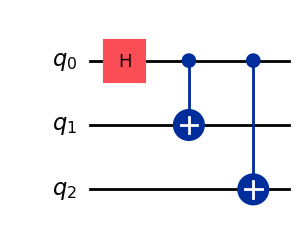

In [6]:
#GHZ State
#Add a Hadamard gate to the first qubit
circ.h(0)
#Add a CNOT gate between the first and second qubit
circ.cx(0,1)
#Add a CNOT gate between the first and third qubit
circ.cx(0,2)

#Draw the circuit
circ.draw("mpl")


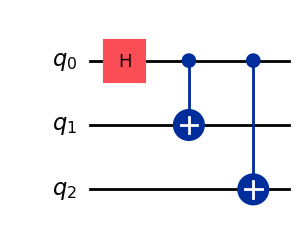

In [7]:

circ.draw("mpl")

In [8]:
#circ.data
circ.data[1]

CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>), clbits=())

In [9]:
from qiskit.quantum_info import Statevector
#Initialize the statevector
state = Statevector.from_instruction(circ)
#Print the statevector
state.draw("latex")



<IPython.core.display.Latex object>

In [10]:
# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

from qiskit.visualization import array_to_latex
#alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

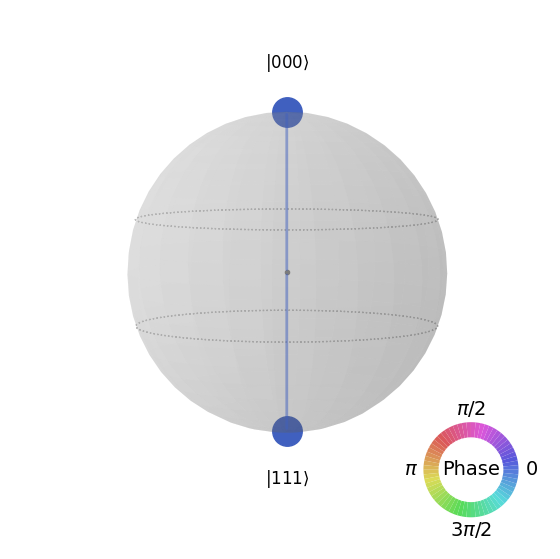

In [11]:

state.draw('qsphere')

## OpenQASM backend

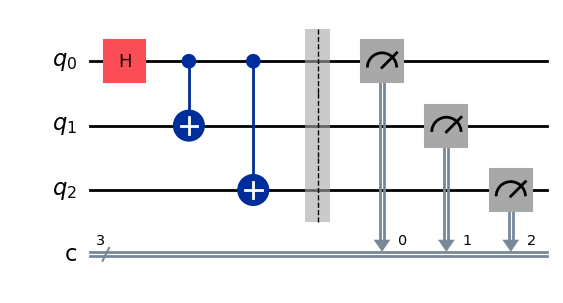

In [12]:
#Create a quantum circuit
meas = QuantumCircuit(3,3)
meas.barrier(range(3))
#map the quantum measurement to the classical bits
meas.measure(range(3),range(3))

qc = meas.compose(circ, range(3), front=True)

qc.draw("mpl")

In [13]:
from qiskit import transpile
from qiskit_aer import AerSimulator

backend = AerSimulator()


In [14]:
qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

# Get results
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 531, '000': 493}


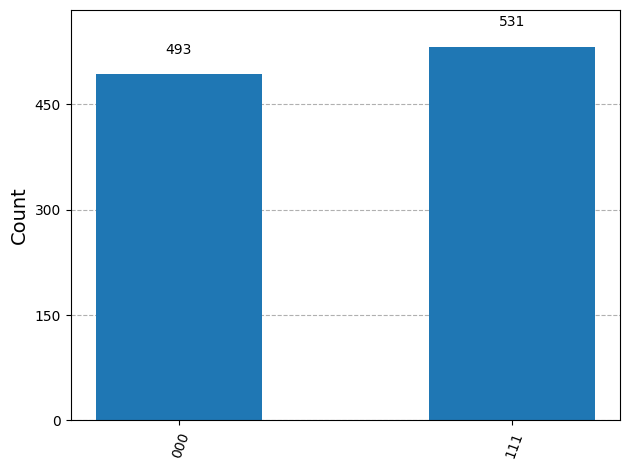

In [15]:
#Visualize
from qiskit.visualization import plot_histogram
plot_histogram(counts)